In [1]:
pip install pandas matplotlib seaborn nltk scikit-learn textblob

In [3]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/task data set/Instagram data.csv", encoding='latin1')
df['Caption'].head()

,Caption
0,Here are some of the most important data visua...
1,Here are some of the best data science project...
2,Learn how to train a machine learning model an...
3,Heres how you can write a Python program to d...
4,Plotting annotations while visualizing your da...


In [4]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # remove special chars
    text = re.sub(r"\s+", " ", text)  # remove extra spaces
    stop_words = set(stopwords.words("english"))
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

df['Cleaned_Caption'] = df['Caption'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Cleaned_Caption'].apply(get_sentiment)
df[['Caption', 'Sentiment']].head()

,Caption,Sentiment
0,Here are some of the most important data visua...,Positive
1,Here are some of the best data science project...,Positive
2,Learn how to train a machine learning model an...,Neutral
3,Heres how you can write a Python program to d...,Neutral
4,Plotting annotations while visualizing your da...,Positive


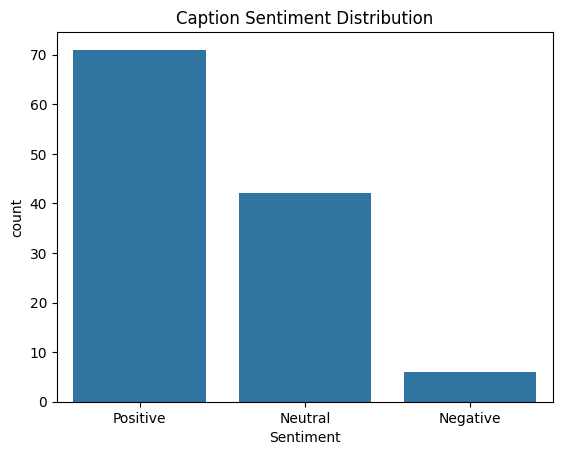

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Sentiment')
plt.title("Caption Sentiment Distribution")
plt.show()

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Cleaned_Caption'])
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Neutral       0.58      0.78      0.67         9
    Positive       0.83      0.67      0.74        15

    accuracy                           0.71        24
   macro avg       0.71      0.72      0.70        24
weighted avg       0.74      0.71      0.71        24

